In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from clickhouse_driver import Client

In [2]:
def get_data():
    client = Client('oleg.orbita.work', port=9000, user='student_ml', password='CGRV8zemLGgsfdz7Uc6ZJeisGTcPQa', settings={'use_numpy': True})
    query = "SELECT * FROM students_datas.game_sales"
    data = pd.DataFrame(client.execute(query), columns=[
        "Name", "Platform", "Year", "Genre", "Publisher",
        "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"
    ])
    data.dropna(subset=["Year"], inplace=True)
    return data
data = get_data()

In [3]:
def analyze_genre_popularity(data):
    before_2000 = data[data["Year"] < 2000]
    after_2000 = data[data["Year"] >= 2000]
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    before_2000["Genre"].value_counts().plot(kind='bar', ax=axes[0, 0], title='Количество игр по жанрам (до 2000)')
    axes[0, 0].tick_params(axis='x', rotation=30)
    before_2000.groupby("Genre")["Global_Sales"].sum().plot(kind='bar', ax=axes[0, 1], title='Общий объем продаж по жанрам (до 2000)')
    axes[0, 1].tick_params(axis='x', rotation=30)
    after_2000["Genre"].value_counts().plot(kind='bar', ax=axes[1, 0], title='Количество игр по жанрам (после 2000)')
    axes[1, 0].tick_params(axis='x', rotation=30)
    after_2000.groupby("Genre")["Global_Sales"].sum().plot(kind='bar', ax=axes[1, 1], title='Общий объем продаж по жанрам (после 2000)')
    axes[1, 1].tick_params(axis='x', rotation=30)
    plt.tight_layout()
    plt.show()

    most_common_before = before_2000["Genre"].value_counts().idxmax()
    top_sales_before = before_2000.groupby("Genre")["Global_Sales"].sum().idxmax()
    most_common_after = after_2000["Genre"].value_counts().idxmax()
    top_sales_after = after_2000.groupby("Genre")["Global_Sales"].sum().idxmax()
    print(f"До 2000 года больше всего игр было в жанре {most_common_before}.")
    print(f"До 2000 года наибольший объём продаж был у игр жанра {top_sales_before}.")
    print(f"После 2000 года больше всего игр было в жанре {most_common_after}.")
    print(f"После 2000 года наибольший объём продаж был у игр жанра {top_sales_after}.")

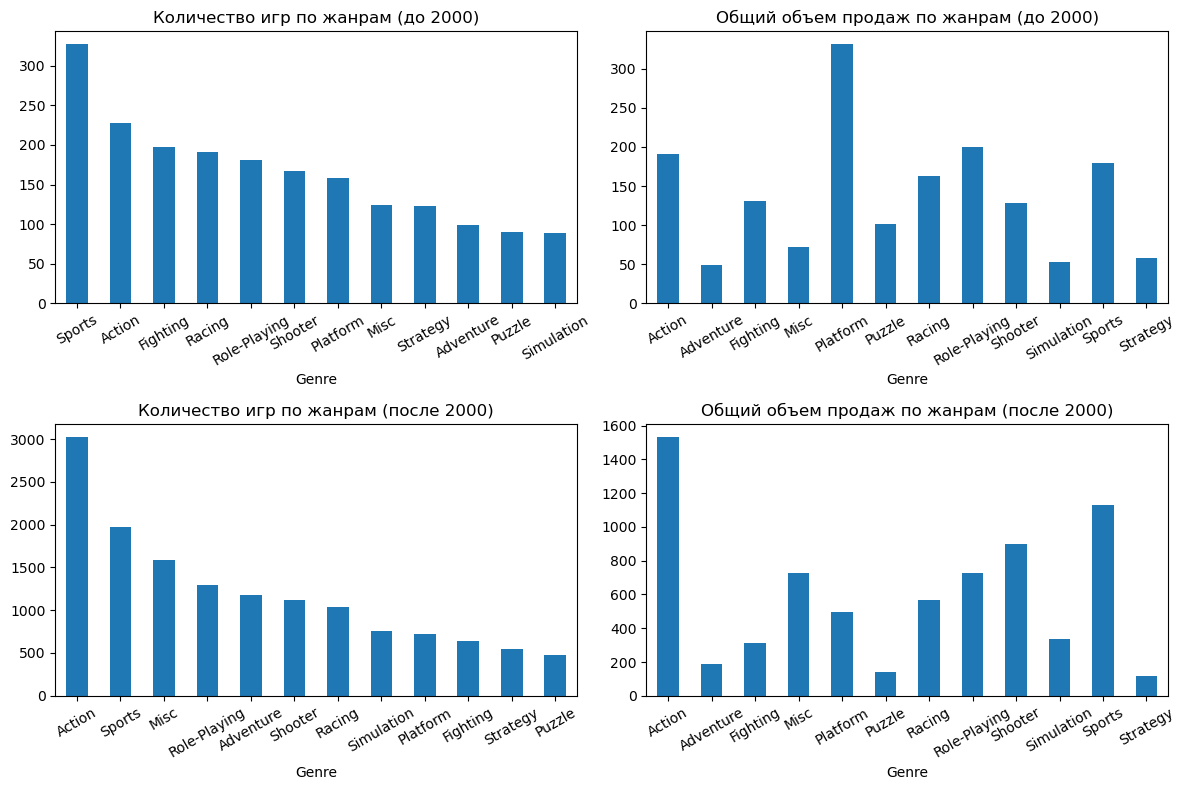

До 2000 года больше всего игр было в жанре Sports.
До 2000 года наибольший объём продаж был у игр жанра Platform.
После 2000 года больше всего игр было в жанре Action.
После 2000 года наибольший объём продаж был у игр жанра Action.


In [4]:
# Визуализация популярности жанров, анализ графиков
analyze_genre_popularity(data)

In [5]:
def games_per_year(data):
    data["Year"].value_counts().sort_index().plot(kind='line', figsize=(10, 5), title='Общее число выпущенных видеоигр по годам')
    plt.xlabel('Год')
    plt.ylabel('Количество игр')
    plt.show()

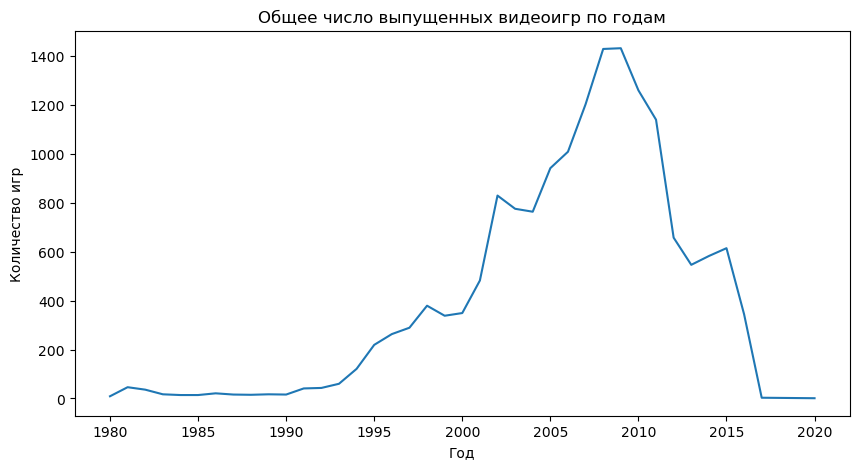

In [6]:
# Визуализация игр по годам
games_per_year(data)

In [7]:
def top_publishers_analysis(data):
    top_publishers = data["Publisher"].value_counts().nlargest(3)
    top_publishers.plot(kind='bar', figsize=(8, 5), title='Топ-3 издателя по количеству игр')
    plt.xticks(rotation=0)
    plt.show()
    
    data_top_publishers = data[data["Publisher"].isin(top_publishers.index)]
    platform_distribution = data_top_publishers.groupby(["Publisher", "Platform"]).size().unstack()
    ax = platform_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), title='Распределение игр топ-3 издателей по платформам')
    plt.xticks(rotation=0)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

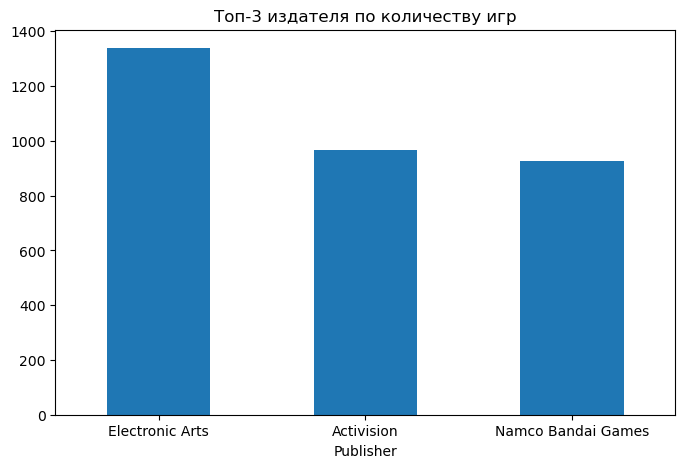

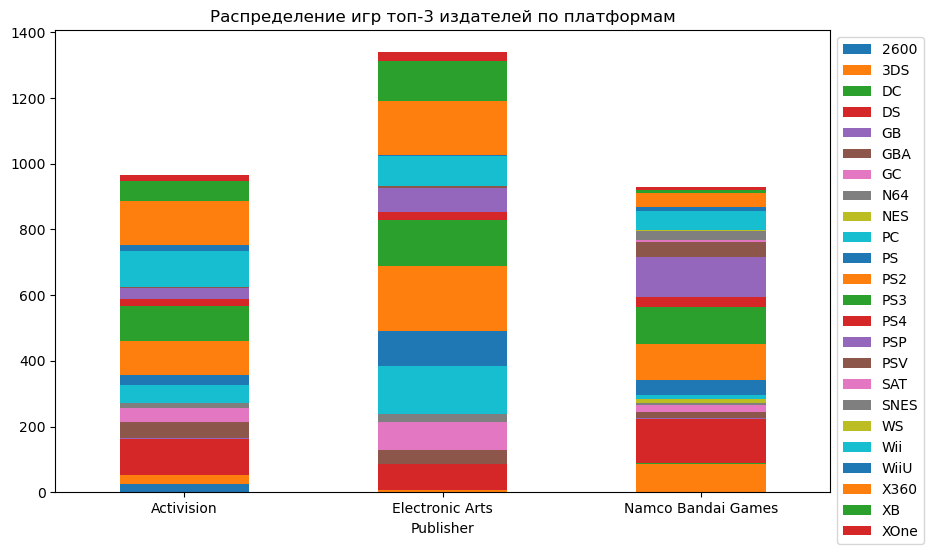

In [8]:
# Визуализация издателей
top_publishers_analysis(data)

In [9]:
def sales_shares(data):
    # Фильтрация данных для двух периодов:
    df_period1 = data[(data["Year"] >= 1980) & (data["Year"] < 2000)]
    df_period2 = data[(data["Year"] >= 2000) & (data["Year"] <= 2020)]
    
    # Для периода 1980-2000:
    sum_NA = df_period1["NA_Sales"].sum()
    sum_EU = df_period1["EU_Sales"].sum()
    sum_JP = df_period1["JP_Sales"].sum()
    sum_global = df_period1["Global_Sales"].sum()
    sum_other = max(sum_global - (sum_NA + sum_EU + sum_JP), 0)
    sales_dict1 = {"NA": sum_NA, "EU": sum_EU, "JP": sum_JP, "Others": sum_other}
    
    # Для периода 2000-2020:
    sum_NA2 = df_period2["NA_Sales"].sum()
    sum_EU2 = df_period2["EU_Sales"].sum()
    sum_JP2 = df_period2["JP_Sales"].sum()
    sum_global2 = df_period2["Global_Sales"].sum()
    sum_other2 = max(sum_global2 - (sum_NA2 + sum_EU2 + sum_JP2), 0)
    sales_dict2 = {"NA": sum_NA2, "EU": sum_EU2, "JP": sum_JP2, "Другие": sum_other2}

    # Построение круговых диаграмм.
    fig, axes = plt.subplots(1, 2, figsize=(12, 7))
    # 1980–2000
    plt.subplot(1, 2, 1)
    plt.pie(sales_dict1.values(), labels=sales_dict1.keys(), autopct='%1.1f%%', startangle=90, colors=['#fff0f5', '#a7d4d0', '#a2a2d0', '#ffebcd'])
    plt.title('Доли продаж по регионам (1980–2000)')
    
    # 2000–2020
    plt.subplot(1, 2, 2)
    plt.pie(sales_dict2.values(), labels=sales_dict2.keys(), autopct='%1.1f%%', startangle=90, colors=['#fff0f5', '#a7d4d0', '#a2a2d0', '#ffebcd'])
    plt.title('Доли продаж по регионам (2000–2020)')
    
    plt.tight_layout()
    plt.show()

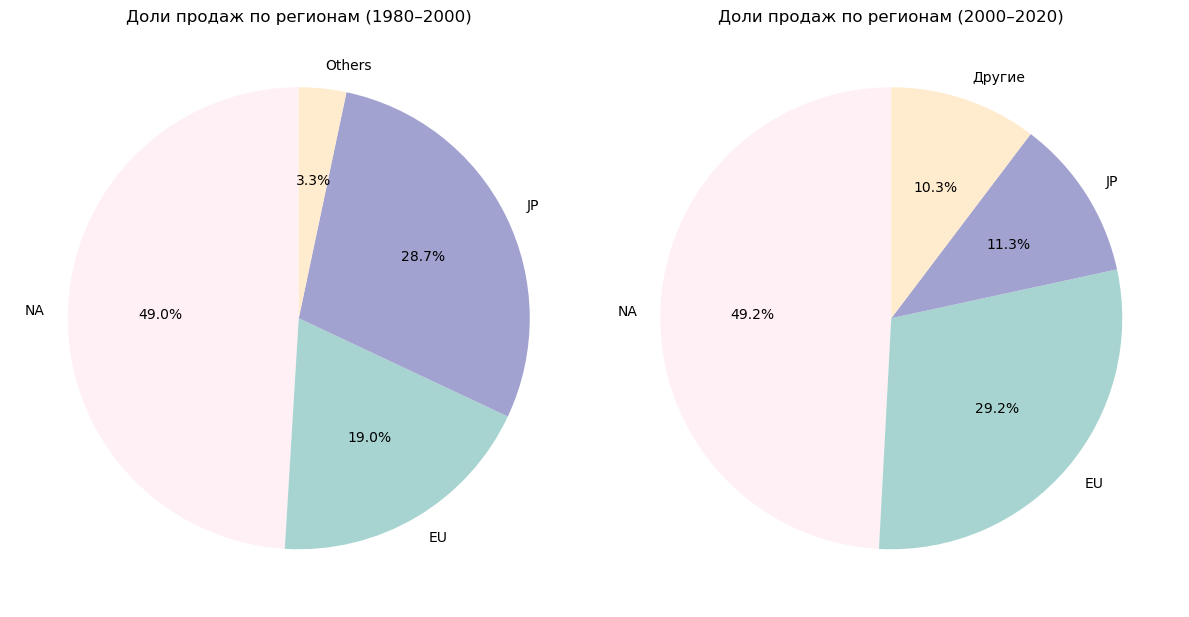

In [10]:
# Визуализация продаж
sales_shares(data)